In [3]:
import os
import yaml
import pickle

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cd ../src/

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


# Data

In [5]:
with open('../data/post_test/rankings_scored.pkl', 'rb') as fp:
    rankings = pickle.load(fp)
    
with open('../data/experiment_keys/permutation_maps/vector_binary.yaml', 'r') as fp:
    permutation_map = yaml.load(fp, Loader=yaml.FullLoader)
    
with open('./visualisers/maps/concat_labels.yaml', 'r') as fp:
    palette = yaml.load(fp, Loader=yaml.FullLoader)
    palette = palette['vector_labels']
    palette['q1'] = '#8AB0AB'
    palette['q2'] = '#3E505B'
    palette['q3'] = '#F2F230'
    palette['q4'] = '#1A1D1A'

In [10]:
rankings_columns = [
    'username', 'field', 'level', 'year', 'consent', 'gender',
    'ranking', 'q1_conf', 'q2_conf', 'q3_conf', 'q4_conf', 
    'notes_text', 'notes_math', 'notes_table', 'notes_diag', 'notes_time', 
    'beerslaw', 'beerslaw_conf', 
    'feedback_entertain', 'feedback_difficult', 'feedback_good', 'feedback_bad', 'feedback',
    'q1_score', 'q2_score', 'q3_score', 'q4_score', 'q5_score', 'q6_score'
]
ranks = rankings[rankings_columns]
ranks['vector_label'] = ranks['ranking'].apply(lambda x: permutation_map['map'][x])

/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_45699/2670205133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranks['vector_label'] = ranks['ranking'].apply(lambda x: permutation_map['map'][x])


In [11]:
rankings

,username,start_time,exploration_time,ranking_task_time,ranking,ranking_confidence,ranking_time,q1,q1_conf,q1_time,q2,q2_conf,q2_time,q3,q3_conf,q3_time,q4,q4_conf,q4_time,q5_colour0,q5_colour1,q5_colour2,q5_colour3,q5_time,q6_colour0,q6_colour1,q6_colour2,q6_colour3,q6_time,q7_colour0,q7_colour1,q7_colour2,q7_colour3,q7_time,q8_colour0,q8_colour1,q8_colour2,q8_colour3,q8_time,formula,fomula_conf,formula_time,notes_text,notes_math,notes_table,notes_diag,notes_time,beerslaw,beerslaw_conf,beerslaw_time,problem_ranking,problem_conf,problem_time,feedback_entertain,feedback_difficult,feedback_good,feedback_bad,feedback,feedback_time,experiment_time,status,session,version,numerical_status,language,field,level,year,consent,gender,q1_label,q1_flag,q2_label,q2_flag,q3_label,q3_flag,q4_label,q4_flag,prior_knowledge,prior_3cat,prior_4cat,q1_score,q2_score,q3_score,q4_score,q5_score,q6_score,q5_score_conf,q6_score_conf
0,bezdgyya,{'time': 1624976039},{'time': 1624976192},{'time': 1624976732},0123,95,1624976779,0.37,95,1624976894,1.59,25,1624977210,1.04,25,1624977454,1.25,5,1624977708,30,50,10,10,1624977769,30,10,20,40,1624977836,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,"Je höher die konzentration ist, desto mehr Lic...",30,1624978171,,,,,1624978220,Wir haben es im Unterricht behandelt und auch ...,,1624978377,"[Ich weiss nicht, Ich weiss nicht, Ich weiss n...",wrong field,1624978459,75,60,Es hat möglichst alle Varianten in Themengebie...,Die Methmatischen Formeln sollten ersichtlich ...,wrong field,1624978762,missing,17,Session 29,3,17,Deutsch,Chemistry,Apprenticeship (Low),2nd,1,1,correct,NaN,correct,NaN,larger,NaN,larger,NaN,NaN,none,none,1,1,0,0,1,0,50.0,10.0
1,y7p64n6z,{'time': 1621608175},{'time': 1621608323},{'time': 1621608571},3012,20,1621608758,"Es wirtd eine Absorbtion von 0,37 gemessen",35,1621608854,Es wird eine Absorption von 1.59,40,1621609048,Es gibt eine Absorbtion von 0.96,25,1621609271,"Eine Absorption von 0,8",30,1621609358,35,35,20,10,1621609536,25,25,25,25,1621609557,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,abc,0,1621609575,,Die Lambertbersche formel benutzt,,,1621609631,Eher nicht so,,1621609644,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,15,Session 16,3,15,Deutsch,Chemistry,Apprenticeship (Low),2nd,1,4,correct,NaN,correct,NaN,correct,NaN,correct,NaN,NaN,none,none,1,1,1,1,0,0,35.0,25.0
2,892r4czm,{'time': 1621607581},{'time': 1621607738},{'time': 1621608261},2031,75,1621608297,0.37,60,1621608413,1.59,60,1621608455,0.96,60,1621608513,0.8,60,1621608566,0,0,0,100,1621608755,0,0,10,90,1621608796,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Desto höher die Konzentration desto höher die ...,80,1621608972,,,,,1621609036,Einigermassen\r\nSchon mal angeschaut und Grun...,,1621609120,"[Ich weiss nicht, Ich weiss nicht, Ich weiss n...",wrong field,1621609564,80,70,Das interaktive Labor,Das man das Labor bei den meisten Aufgaben nic...,wrong field,1621609625,missing,17,Session 16,3,17,Deutsch,Chemistry,Apprenticeship (Low),2nd,1,1,correct,NaN,correct,NaN,correct,NaN,correct,NaN,NaN,none,none,1,1,1,1,0,0,0.0,0.0
3,uhbpoog9,{'time': 1623310779},{'time': 1623311006},{'time': 1623311164},0213,5,1623311191,0.37,70,1623311262,1.69,85,1623311348,0.96,30,1623311421,0.8,60,1623311563,0,100,0,0,1623311621,0,0,0,100,1623311672,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,konz. Lösung\r\nBreite Becherglas je breiter d...,0,1623311830,Ich versuchte die Begriffe kurz zu erklären,,,,1623311909,Ich habe es fast nicht gekannt,,1623311945,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,15,Session 18,3,15,Deutsch,Chemistry,Apprenticeship (Low),1st,1,1,correct,NaN,larger,NaN,correct,NaN,correct,NaN,NaN,none,none,1,0,1,1,1,0,100.0,0.0
4,bed4zkv2,{'time': 1624864473},{'time': 1624864742},{'time': 1624864751},1023,20,1624864852,1.48,15,162

# Scores

## Labels
Scores distribution for each question, per vector label

In [14]:
def get_n_people(df, question:str, score:int) -> int:
    """
    This function returns the amount of people who got score *score* for question *question*
    """
    return len(df[df[question] == score])

def get_percent_people(df, question, score:int) -> float:
    return len(df[df[question] == score]) / len(df)

def plot_axis(axis, df, name):
    x = [0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16]
    x_ticks = ['wrong', 'correct', 'wrong', 'correct', 'wrong', 'correct', 'wrong', 'correct', 'wrong','correct', 'wrong', 'correct']
    y = [
        get_percent_people(df, 'q1_score', 0),
        get_percent_people(df, 'q1_score', 1),
        get_percent_people(df, 'q2_score', 0),
        get_percent_people(df, 'q2_score', 1),
        get_percent_people(df, 'q3_score', 0),
        get_percent_people(df, 'q3_score', 1),
        get_percent_people(df, 'q4_score', 0),
        get_percent_people(df, 'q4_score', 1),
        get_percent_people(df, 'q5_score', 0),
        get_percent_people(df, 'q5_score', 1),
        get_percent_people(df, 'q6_score', 0),
        get_percent_people(df, 'q6_score', 1),
    ]

    axis.bar(x[0:2], y[0:2], label='width', color=palette['q1'])
    axis.bar(x[2:4], y[2:4], label='conc', color=palette['q2'])
    axis.bar(x[4:6], y[4:6], label='w&c', color=palette['q3'])
    axis.bar(x[6:8], y[6:8], label='w&c', color=palette['q4'])
    axis.bar(x[8:10], y[8:10], label='colour', color='dodgerblue')
    axis.bar(x[10:], y[10:], label='colour', color='maroon')
    
    axis.set_xticks(x)
    axis.set_xticklabels(x_ticks)
    
    axis.set_xlabel(name)
    axis.set_ylim([0, 1])
    axis.set_ylabel('#apprentices')
    axis.legend()
    
def plot_question_labels():
    fig, axis = plt.subplots(4, 2, figsize=(20, 15))

    v000 = ranks[ranks['vector_label'] == '000']
    v100 = ranks[ranks['vector_label'] == '100']
    v010 = ranks[ranks['vector_label'] == '010']
    v001 = ranks[ranks['vector_label'] == '001']
    v110 = ranks[ranks['vector_label'] == '110']
    v101 = ranks[ranks['vector_label'] == '101']
    v011 = ranks[ranks['vector_label'] == '011']
    v111 = ranks[ranks['vector_label'] == '111']

    plot_axis(axis[0, 0], v000, '000')
    plot_axis(axis[0, 1], v100, '100')
    plot_axis(axis[1, 0], v010, '010')
    plot_axis(axis[1, 1], v001, '001')
    plot_axis(axis[2, 0], v110, '110')
    plot_axis(axis[2, 1], v101, '101')
    plot_axis(axis[3, 0], v011, '011')
    plot_axis(axis[3, 1], v111, '111')
    
    plt.suptitle('Score distribution for colour - concentration - width')
    plt.show()



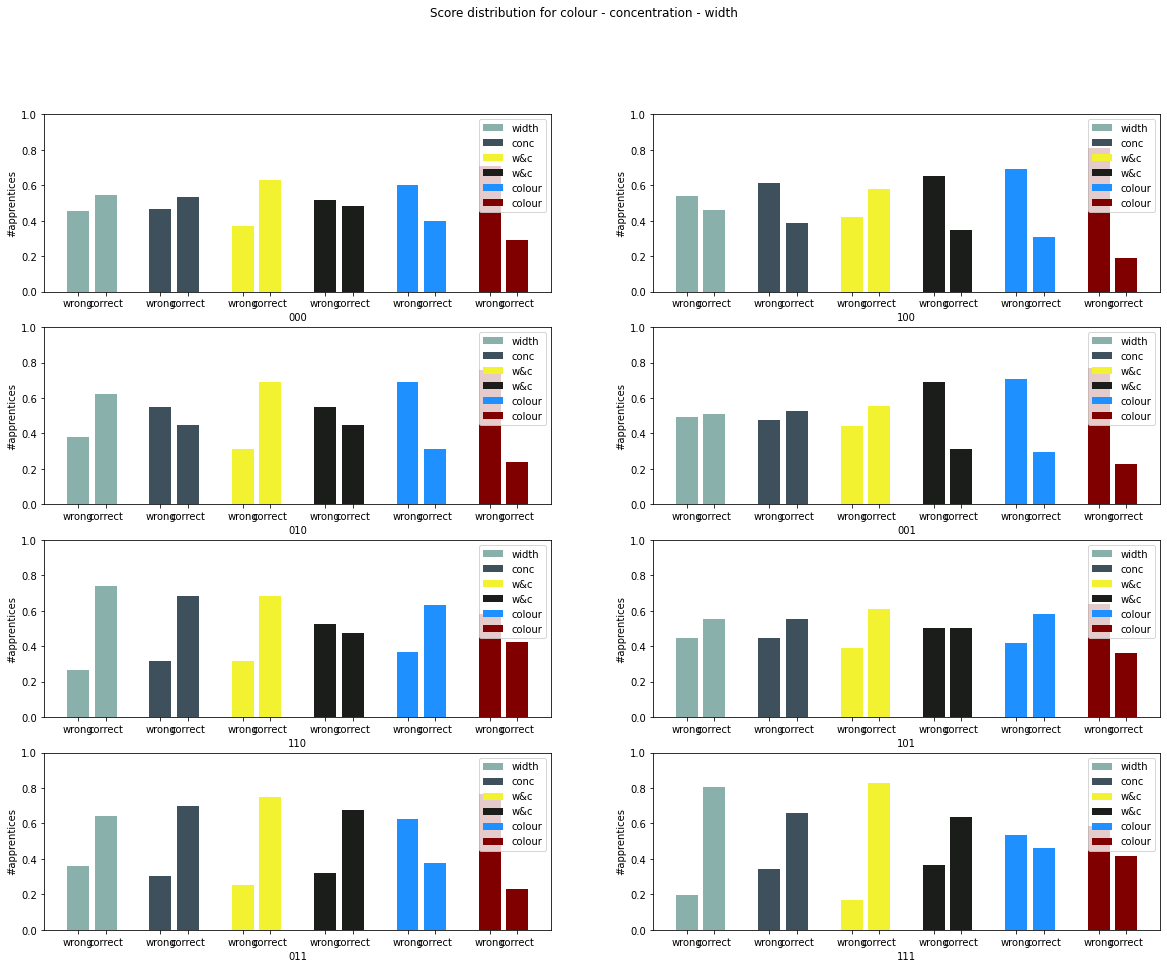

In [15]:
plot_question_labels()

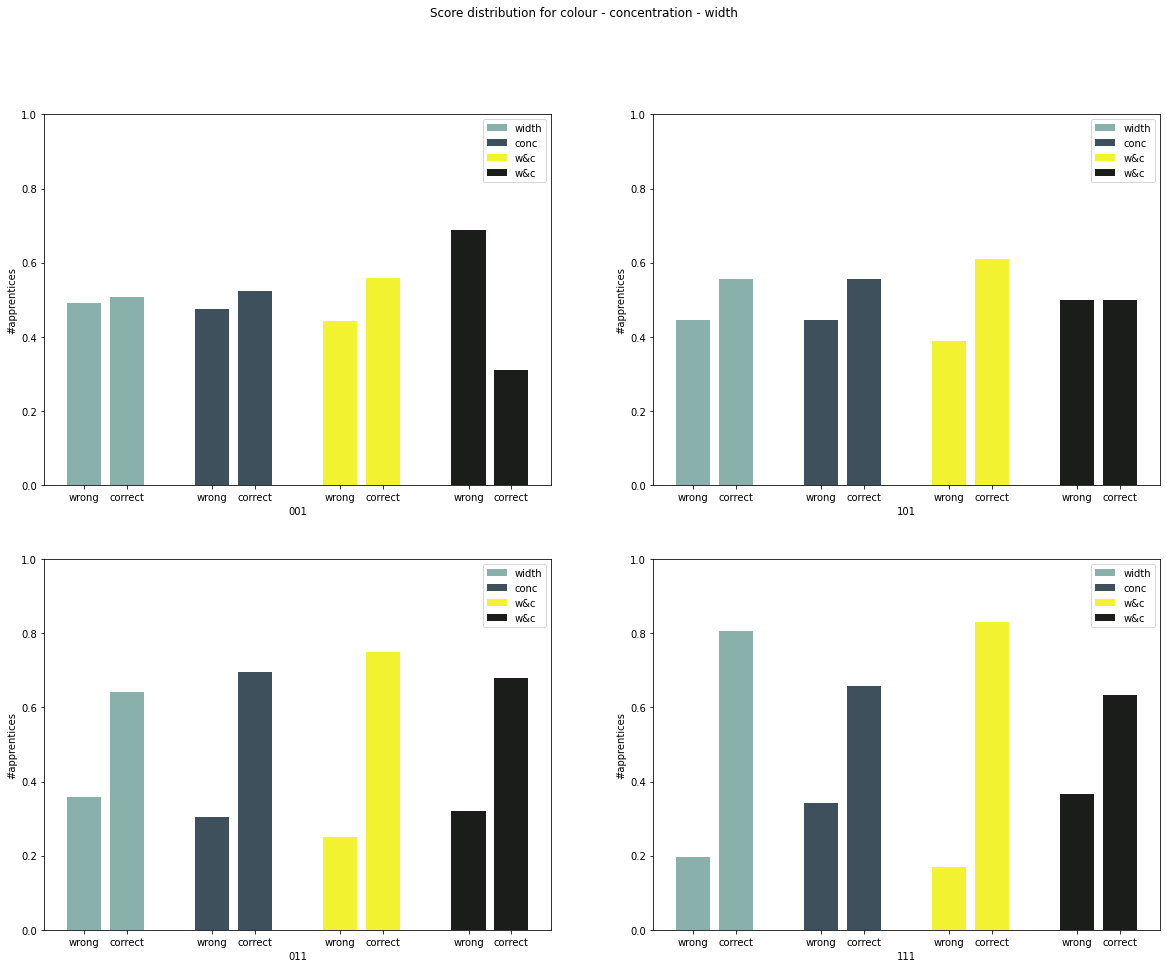

In [8]:
def plot_question_width():
    fig, axis = plt.subplots(2, 2, figsize=(20, 15))

    v001 = ranks[ranks['vector_label'] == '001']
    v101 = ranks[ranks['vector_label'] == '101']
    v011 = ranks[ranks['vector_label'] == '011']
    v111 = ranks[ranks['vector_label'] == '111']

    plot_axis(axis[0, 0], v001, '001')
    plot_axis(axis[0, 1], v101, '101')
    plot_axis(axis[1, 0], v011, '011')
    plot_axis(axis[1, 1], v111, '111')
    
    plt.suptitle('Score distribution for colour - concentration - width')
    plt.show()

plot_question_width()

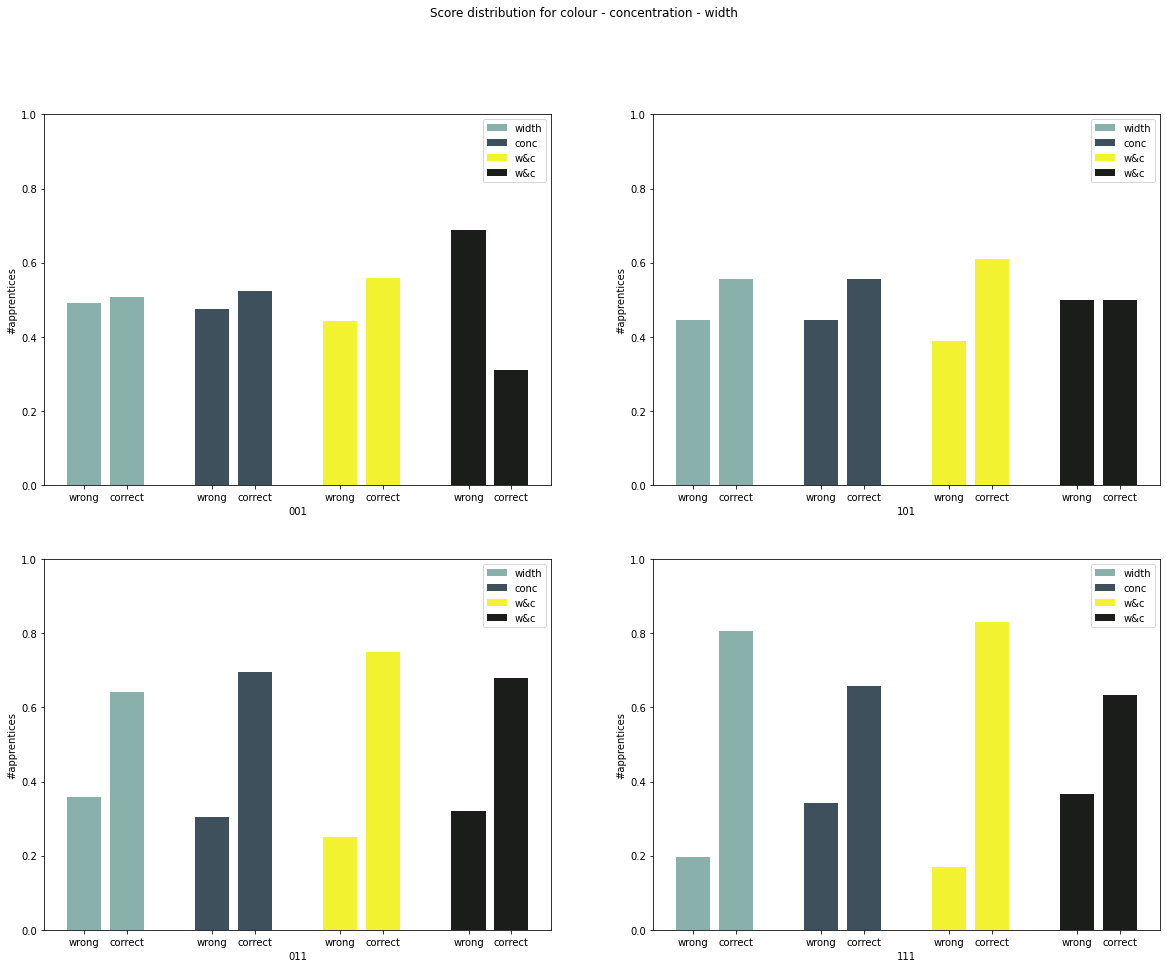

In [9]:
def plot_question_concentration():
    fig, axis = plt.subplots(2, 2, figsize=(20, 15))

    v001 = ranks[ranks['vector_label'] == '010']
    v101 = ranks[ranks['vector_label'] == '110']
    v011 = ranks[ranks['vector_label'] == '011']
    v111 = ranks[ranks['vector_label'] == '111']

    plot_axis(axis[0, 0], v010, '010')
    plot_axis(axis[0, 1], v110, '110')
    plot_axis(axis[1, 0], v011, '011')
    plot_axis(axis[1, 1], v111, '111')
    
    plt.ylim([0, 50])
    plt.suptitle('Score distribution for colour - concentration - width')
    plt.show()

plot_question_width()

## Confidence

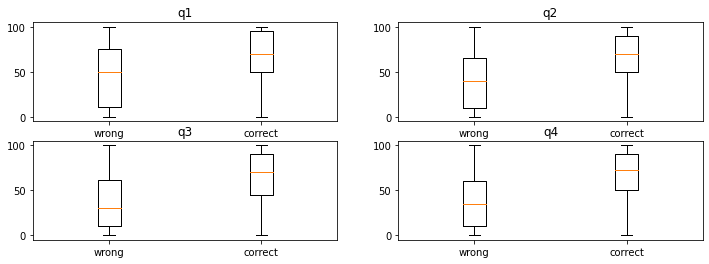

In [10]:
fig, axis = plt.subplots(2, 2, figsize=(12, 4))
q1_wrong = ranks[ranks['q1_score'] == 0]
q1_correct = ranks[ranks['q1_score'] == 1]
axis[0, 0].boxplot([q1_wrong['q1_conf'].astype(int), q1_correct['q1_conf'].astype(int)])
axis[0, 0].set_xticklabels(['wrong', 'correct'])
axis[0, 0].set_title('q1')

q2_wrong = ranks[(ranks['q2_score'] == 0) & (ranks['q2_conf'] != 'missing')]
q2_correct = ranks[(ranks['q2_score'] == 1) & (ranks['q2_conf'] != 'missing')]
axis[0, 1].boxplot([q2_wrong['q2_conf'].astype(int), q2_correct['q2_conf'].astype(int)])
axis[0, 1].set_xticklabels(['wrong', 'correct'])
axis[0, 1].set_title('q2')

q3_wrong = ranks[(ranks['q3_score'] == 0) & (ranks['q3_conf'] != 'missing')]
q3_correct = ranks[(ranks['q3_score'] == 1) & (ranks['q3_conf'] != 'missing')]
axis[1, 0].boxplot([q3_wrong['q3_conf'].astype(int), q3_correct['q3_conf'].astype(int)])
axis[1, 0].set_xticklabels(['wrong', 'correct'])
axis[1, 0].set_title('q3')

q4_wrong = ranks[(ranks['q4_score'] == 0) & (ranks['q4_conf'] != 'missing')]
q4_correct = ranks[(ranks['q4_score'] == 1) & (ranks['q4_conf'] != 'missing')]
axis[1, 1].boxplot([q4_wrong['q4_conf'].astype(int), q4_correct['q4_conf'].astype(int)])
axis[1, 1].set_xticklabels(['wrong', 'correct'])
axis[1, 1].set_title('q4')

plt.show()

In [11]:
def get_sub_df(df, attribute:str, label):
    """
    returns the part of the dataframe who's attribute *attribute* is *label*
    """
    return df[df[attribute] == label]

def plot_boxplot_distribution(df, question:str, attribute:str, axis):
    """
    Make distribution of score + confidence boxplot for each score for question *question*, for group
    with attribute *attribute*
    """
    score_column = question + '_score'
    conf_column = question + '_conf'
    
    # correct vs wrong answers
    wrong = df[(df[score_column] == 0) & (df[conf_column] != 'missing')]
    correct = df[(df[score_column] == 1) & (df[conf_column] != 'missing')]
    
    # score distribution
    axis.bar([1, 2], [len(wrong)*100/len(df), len(correct)*100/len(df)], alpha=0.3, color=palette[question])
    # confidence boxplot
    axis.boxplot([wrong[conf_column].astype(int), correct[conf_column].astype(int)])
    
    #aesthetic
    axis.set_xticklabels(['wrong', 'correct'])
    axis.set_title(question + ' - ' + attribute)
    

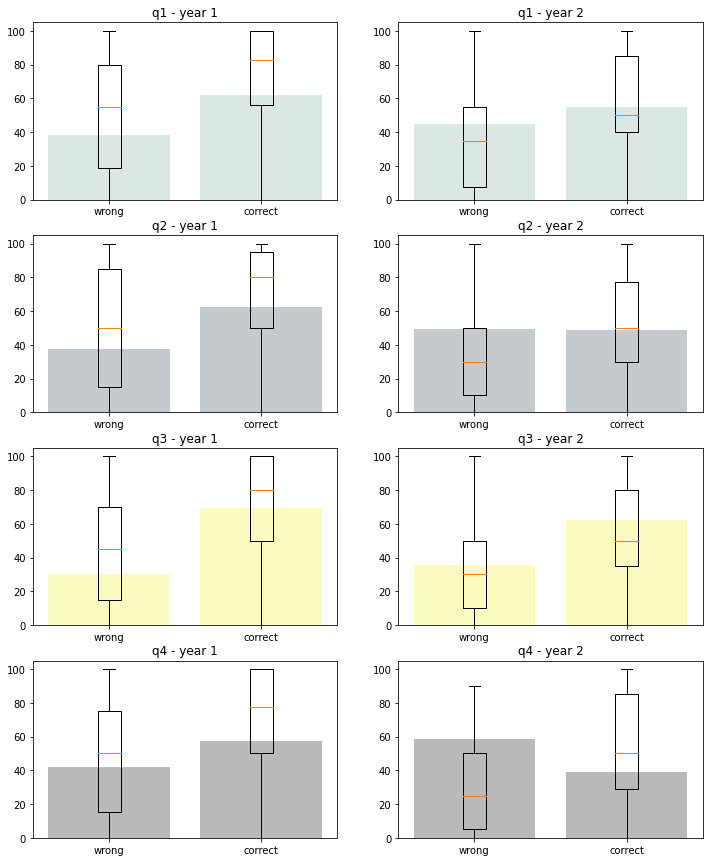

In [12]:
fig, axis = plt.subplots(4, 2, figsize=(12, 15))

cliche = get_sub_df(ranks, 'gender', 1)
plot_boxplot_distribution(cliche, 'q1', 'year 1', axis[0, 0])
plot_boxplot_distribution(cliche, 'q2', 'year 1', axis[1, 0])
plot_boxplot_distribution(cliche, 'q3', 'year 1', axis[2, 0])
plot_boxplot_distribution(cliche, 'q4', 'year 1', axis[3, 0])

non_cliche = get_sub_df(ranks, 'gender', 2)
plot_boxplot_distribution(non_cliche, 'q1', 'year 2', axis[0, 1])
plot_boxplot_distribution(non_cliche, 'q2', 'year 2', axis[1, 1])
plot_boxplot_distribution(non_cliche, 'q3', 'year 2', axis[2, 1])
plot_boxplot_distribution(non_cliche, 'q4', 'year 2', axis[3, 1])

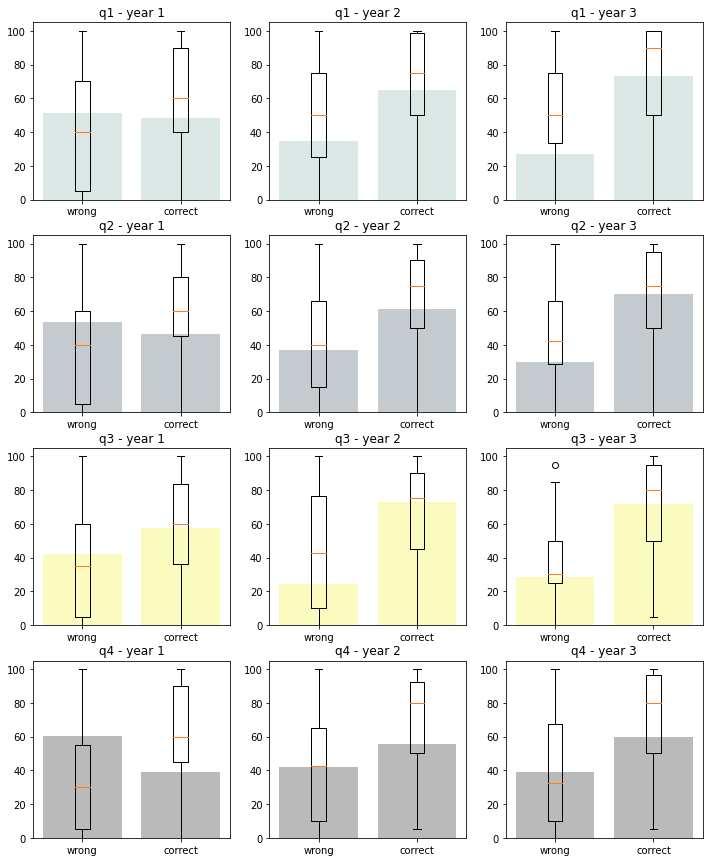

In [13]:
fig, axis = plt.subplots(4, 3, figsize=(12, 15))

year1 = get_sub_df(ranks, 'year', '1st')
plot_boxplot_distribution(year1, 'q1', 'year 1', axis[0, 0])
plot_boxplot_distribution(year1, 'q2', 'year 1', axis[1, 0])
plot_boxplot_distribution(year1, 'q3', 'year 1', axis[2, 0])
plot_boxplot_distribution(year1, 'q4', 'year 1', axis[3, 0])

year2 = get_sub_df(ranks, 'year', '2nd')
plot_boxplot_distribution(year2, 'q1', 'year 2', axis[0, 1])
plot_boxplot_distribution(year2, 'q2', 'year 2', axis[1, 1])
plot_boxplot_distribution(year2, 'q3', 'year 2', axis[2, 1])
plot_boxplot_distribution(year2, 'q4', 'year 2', axis[3, 1])

year3 = get_sub_df(ranks, 'year', '3rd')
plot_boxplot_distribution(year3, 'q1', 'year 3', axis[0, 2])
plot_boxplot_distribution(year3, 'q2', 'year 3', axis[1, 2])
plot_boxplot_distribution(year3, 'q3', 'year 3', axis[2, 2])
plot_boxplot_distribution(year3, 'q4', 'year 3', axis[3, 2])

In [14]:
ranks.columns

Index(['username', 'field', 'level', 'year', 'consent', 'gender', 'ranking',
       'q1_conf', 'q2_conf', 'q3_conf', 'q4_conf', 'notes_text', 'notes_math',
       'notes_table', 'notes_diag', 'notes_time', 'beerslaw', 'beerslaw_conf',
       'feedback_entertain', 'feedback_difficult', 'feedback_good',
       'feedback_bad', 'feedback', 'q1_score', 'q2_score', 'q3_score',
       'q4_score', 'vector_label'],
      dtype='object')

In [15]:
def get_average_confidence(row):
    conf = 0
    nr = 0
    if row['q1_conf'] != 'missing':
        conf += int(row['q1_conf'])
        nr += 1
    if row['q2_conf'] != 'missing':
        conf += int(row['q2_conf'])
        nr += 1
    if row['q3_conf'] != 'missing': 
        conf += int(row['q3_conf'])
        nr += 1
    if row['q4_conf'] != 'missing':
        conf += int(row['q4_conf'])
        nr += 1
        
    return conf / nr
    
def confidence_plot_scores(df, axis, title_addendum):
    """
    takes df, and creates the average confidence plot for each post test scores
    """
    df['overall_score'] = df['q1_score'] + df['q2_score'] + df['q3_score'] + df['q4_score']
    df['average_confidence'] = df.apply(get_average_confidence, axis=1)

    zero = df[(df['overall_score'] == 0)]
    one = df[(df['overall_score'] == 1)]
    two = df[(df['overall_score'] == 2)]
    third = df[(df['overall_score'] == 3)]
    fourth = df[(df['overall_score'] == 4)]

    # score distribution
    axis.bar(
        [1, 2, 3, 4, 5],
        [len(zero)*100/len(df), len(one)*100/len(df), len(two)*100/len(df), 
         len(third)*100/len(df), len(fourth)*100/len(df)], 
        alpha=0.3, color=[palette['q1'], palette['q2'], palette['q3'], palette['q4'], palette['000']]
    )
    # confidence boxplot
    axis.boxplot([
        zero['average_confidence'].astype(int), one['average_confidence'].astype(int),
        two['average_confidence'].astype(int), third['average_confidence'].astype(int),
        fourth['average_confidence'].astype(int)
    ])

    #aesthetic
    axis.set_xticklabels([0, 1, 2, 3, 4])
    axis.set_xlabel('scores')
    axis.set_ylabel('%confidence')
    axis.set_title('Confidence levels per scores' + title_addendum)


/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_score'] = df['q1_score'] + df['q2_score'] + df['q3_score'] + df['q4_score']
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_confidence'] = df.apply(get_average_confidence, axis=1)
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopy

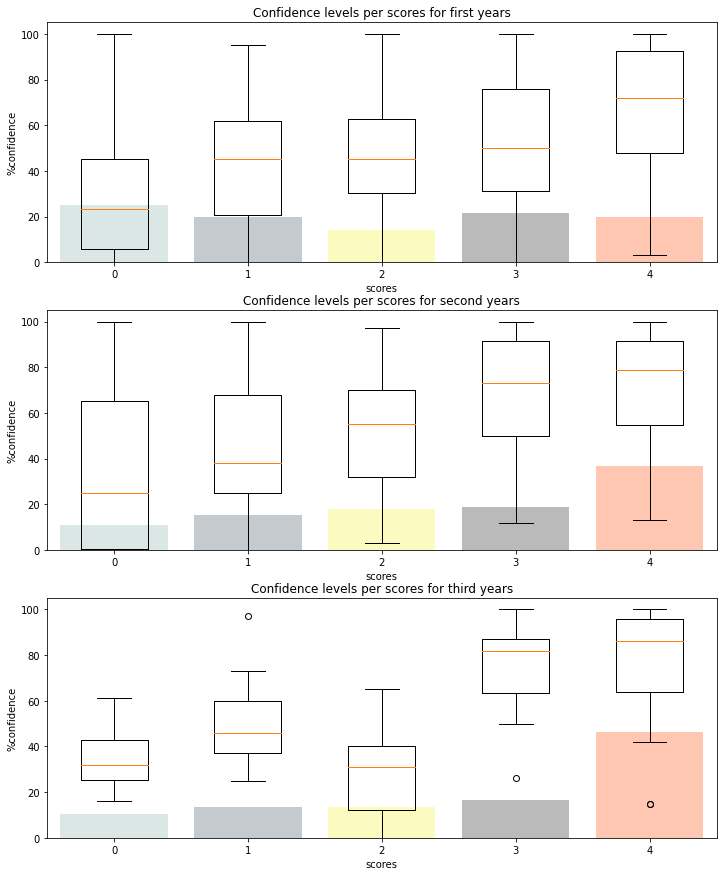

In [16]:
fig, axis = plt.subplots(3, 1, figsize=(12, 15))

year1 = get_sub_df(ranks, 'year', '1st')
confidence_plot_scores(year1, axis[0], ' for first years')

year2 = get_sub_df(ranks, 'year', '2nd')
confidence_plot_scores(year2, axis[1], ' for second years')

year3 = get_sub_df(ranks, 'year', '3rd')
confidence_plot_scores(year3, axis[2], ' for third years')

plt.show()

/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_score'] = df['q1_score'] + df['q2_score'] + df['q3_score'] + df['q4_score']
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_confidence'] = df.apply(get_average_confidence, axis=1)
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopy

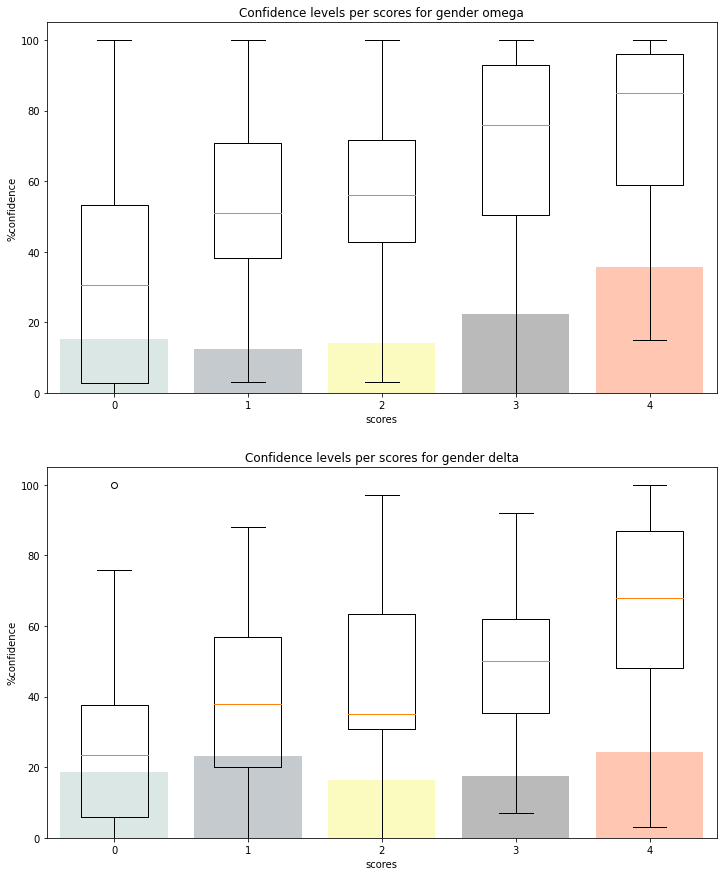

In [17]:
fig, axis = plt.subplots(2, 1, figsize=(12, 15))

gender1 = get_sub_df(ranks, 'gender', 1)
confidence_plot_scores(gender1, axis[0], ' for gender omega')

gender2 = get_sub_df(ranks, 'gender', 2)
confidence_plot_scores(gender2, axis[1], ' for gender delta')

plt.show()

/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_score'] = df['q1_score'] + df['q2_score'] + df['q3_score'] + df['q4_score']
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_confidence'] = df.apply(get_average_confidence, axis=1)
/var/folders/jy/0pp1md9x1358dt8g8k69srhr0000gp/T/ipykernel_44895/1756706356.py:23: SettingWithCopy

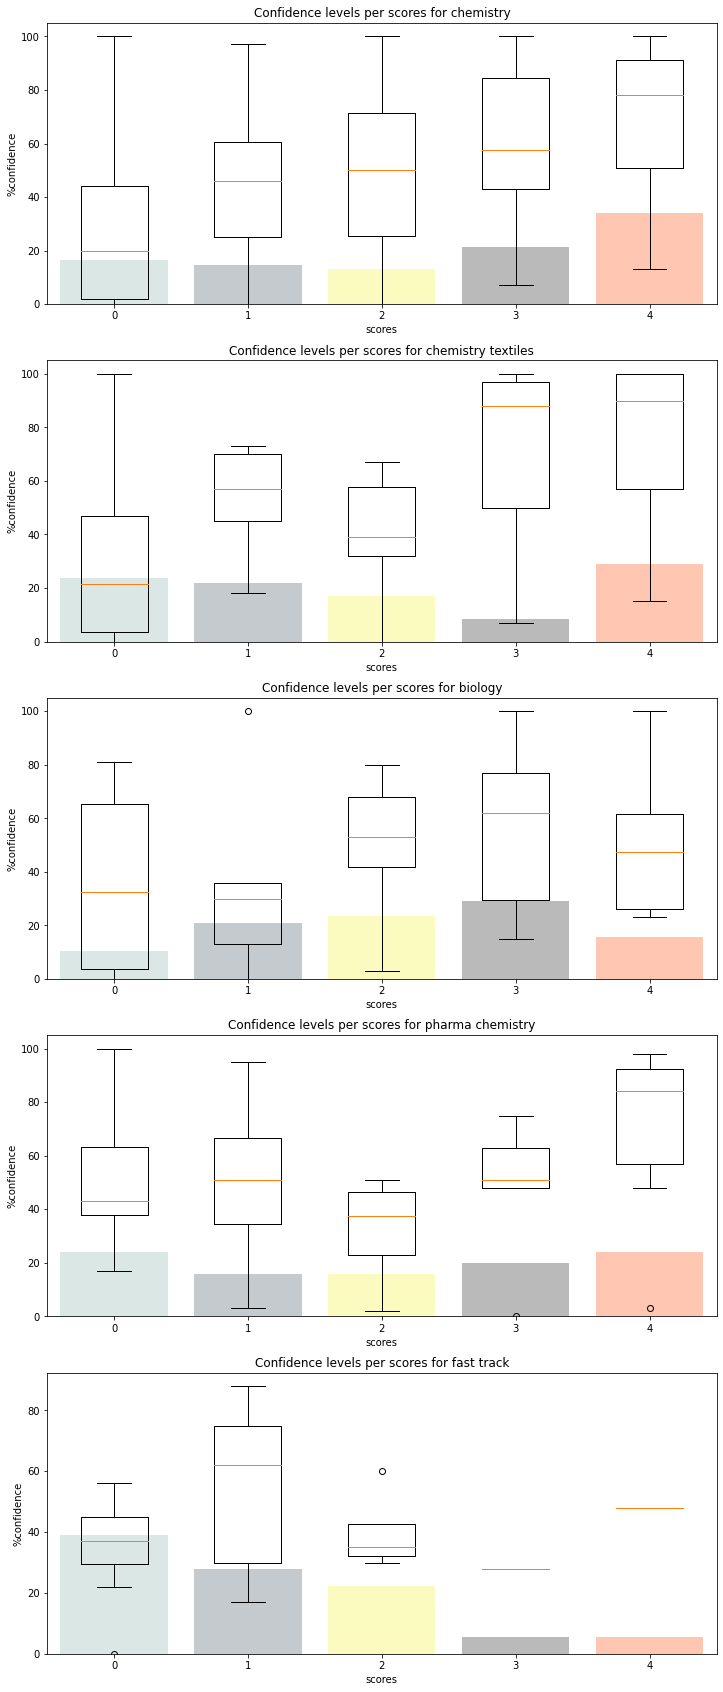

In [18]:
fig, axis = plt.subplots(5, 1, figsize=(12, 30))

chemistry = get_sub_df(ranks, 'field', 'Chemistry')
confidence_plot_scores(chemistry, axis[0], ' for chemistry')

textiles = get_sub_df(ranks, 'field', 'Chemistry, Textiles')
confidence_plot_scores(textiles, axis[1], ' for chemistry textiles')

biology = get_sub_df(ranks, 'field', 'Biology')
confidence_plot_scores(biology, axis[2], ' for biology')

pharma = get_sub_df(ranks, 'field', 'Pharma Chemistry')
confidence_plot_scores(pharma, axis[3], ' for pharma chemistry')

fast = get_sub_df(ranks, 'field', 'Fast track')
confidence_plot_scores(fast, axis[4], ' for fast track')

plt.show()

# Popularity of ranking

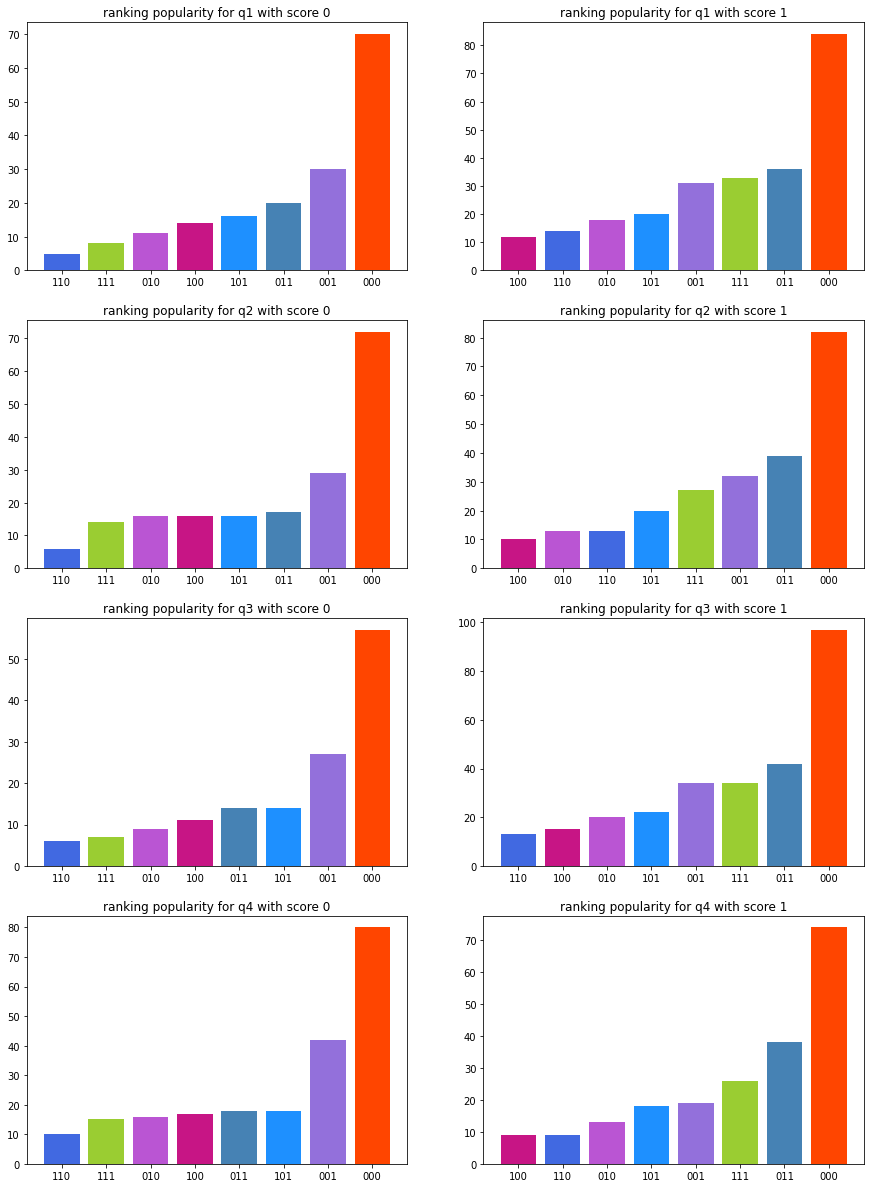

In [19]:
def subplot_ranking_question(df, question:str, correct:int, axis):
    '''
    plots the distribution of people in each ranking for a particular 'question' with a particular 'correct' score
    '''
    q = get_sub_df(df, question + '_score', correct)
    q = q.groupby('vector_label').nunique()['username'].reset_index().sort_values('username')
    axis.bar(range(len(q)), q['username'], color=[palette[c] for c in q['vector_label']])
    axis.set_xticks(range(len(q)))
    axis.set_xticklabels(q['vector_label'])
    axis.set_title('ranking popularity for ' + question + ' with score ' + str(correct))

fig, axis = plt.subplots(4, 2, figsize=(15, 21))
subplot_ranking_question(ranks, 'q1', 0, axis[0, 0])
subplot_ranking_question(ranks, 'q1', 1, axis[0, 1])

subplot_ranking_question(ranks, 'q2', 0, axis[1, 0])
subplot_ranking_question(ranks, 'q2', 1, axis[1, 1])

subplot_ranking_question(ranks, 'q3', 0, axis[2, 0])
subplot_ranking_question(ranks, 'q3', 1, axis[2, 1])

subplot_ranking_question(ranks, 'q4', 0, axis[3, 0])
subplot_ranking_question(ranks, 'q4', 1, axis[3, 1])
